In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
ds= data.copy()
ds

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
# Drop the 'Address' column as it is not needed for prediction
ds.drop('Address',axis=1, inplace=True)
ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [5]:
#data Overview
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [6]:
#checking for duplicated file
ds.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [7]:
# checking for missing values
ds.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [8]:
## displaying categorical and numerical data types)

cat = ds.select_dtypes(exclude = "number")
num = ds.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Date')
display(cat.head())

Numerical Data


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05




Categorical Date


""
0
1
2
3
4


In [9]:
## Statistical Summary of DataFrame
ds.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [12]:
#using the describe method ,we will ascertain the columns ti be scaled by selecting columns with high standard deviation
cols_to_scale = []
for i in ds.select_dtypes(include = 'number').columns:
    if ds[i].describe()[2] > 1500:
        cols_to_scale.append(i)

cols_to_scale

['Avg. Area Income', 'Area Population', 'Price']

In [13]:
#..................................Standard Scaling.................................
from sklearn.preprocessing import StandardScaler,LabelEncoder
import joblib
scaler_holder = {}

for columns in cols_to_scale[: -1]:
    scaler = StandardScaler()
    ds[columns] = scaler.fit_transform(ds[[columns]])
    scaler_holder[columns + '_scale'] = scaler
    joblib.dump(scaler,open(f'{columns}_scaler.pkl','wb'))
    print(f"{columns} successfully scaled")

Avg. Area Income successfully scaled
Area Population successfully scaled


,Price
Avg. Area Number of Bedrooms,
5.14,1.607233e+06
5.50,1.584794e+06
5.15,1.536191e+06
6.32,1.523839e+06
6.24,1.521457e+06
6.10,1.500380e+06
5.46,1.495660e+06
6.21,1.495319e+06
5.24,1.479250e+06


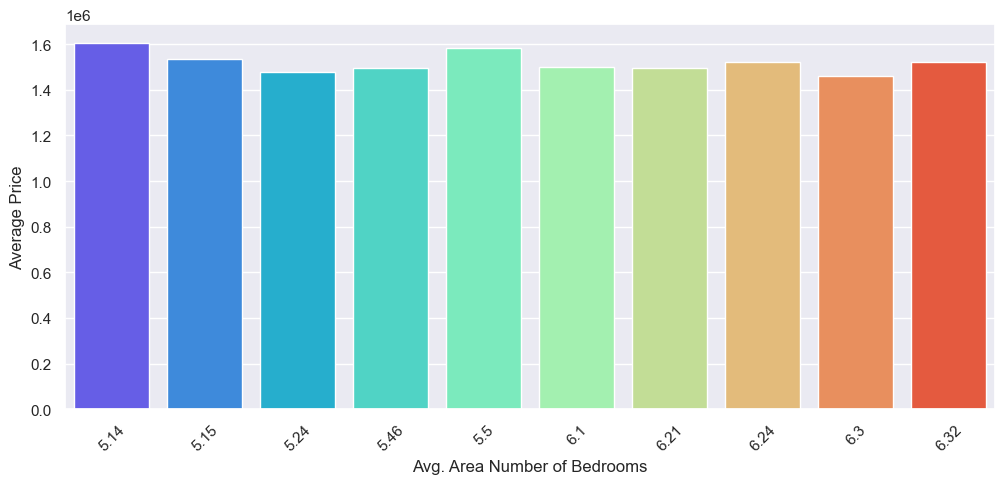

In [16]:
# Analyzing the Impact of Number of Bedrooms on Price
avgrooms = ds[['Avg. Area Number of Bedrooms', 'Price']]
avgrooms =avgrooms.groupby('Avg. Area Number of Bedrooms')[['Price']].mean().sort_values(by='Price', ascending=False).head(10)
display(avgrooms)

# Plot the results with a title for Avg. Area Number of Bedrooms
plt.figure(figsize=(12, 5))
sns.barplot(data=avgrooms, x=avgrooms.index, y='Price', ci=None, palette='rainbow')
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

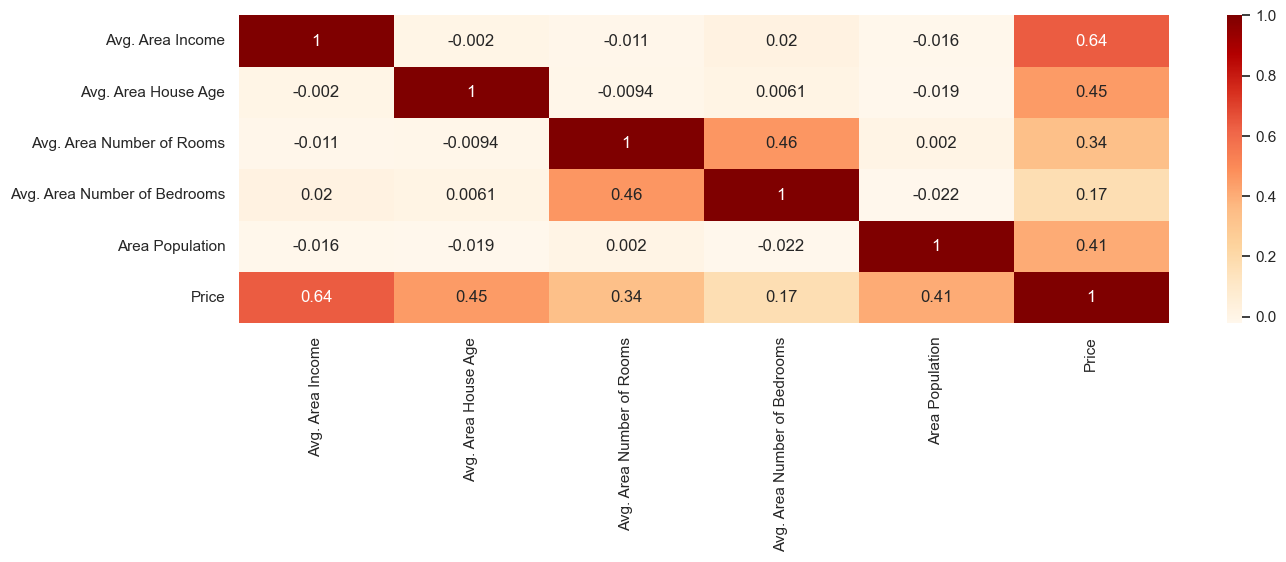

In [17]:
# check for multicollinearity

corr = ds.corr()
display (corr)
plt.figure(figsize = (15,4))
sns.heatmap(corr, annot = True, cmap = 'OrRd')

In [18]:
#checking linear relationships
import matplotlib.pyplot as plt
def plotter(dataframe, col1, col2, col3, dependent):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (20,4))

    plt.subplot(1,3,1)
    sns.regplot(x = dataframe[col1], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col1} and {dependent} is {dataframe[dependent].corr(dataframe[col1]).round(2)}")

    plt.subplot(1,3,2)
    sns.regplot(x = dataframe[col2], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col2} and {dependent} is {dataframe[dependent].corr(dataframe[col2]).round(2)}")

    plt.subplot(1,3,3)
    sns.regplot(x = dataframe[col3], y = dataframe[dependent], ci = 0)
    plt.title(f"Relationship Btw {col3} and {dependent} is {dataframe[dependent].corr(dataframe[col3]).round(2)}")

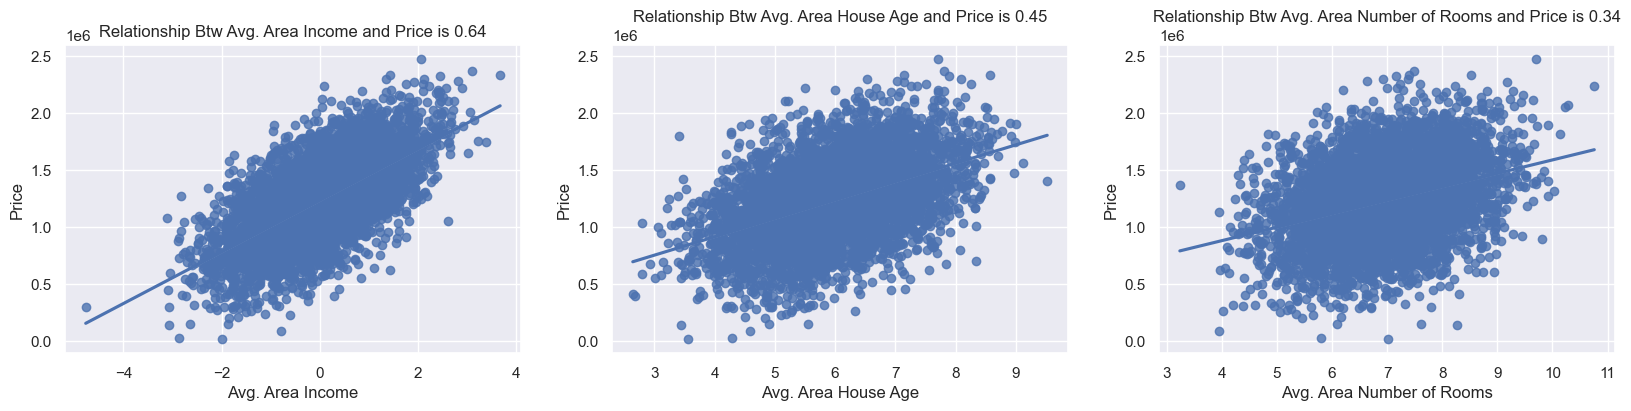

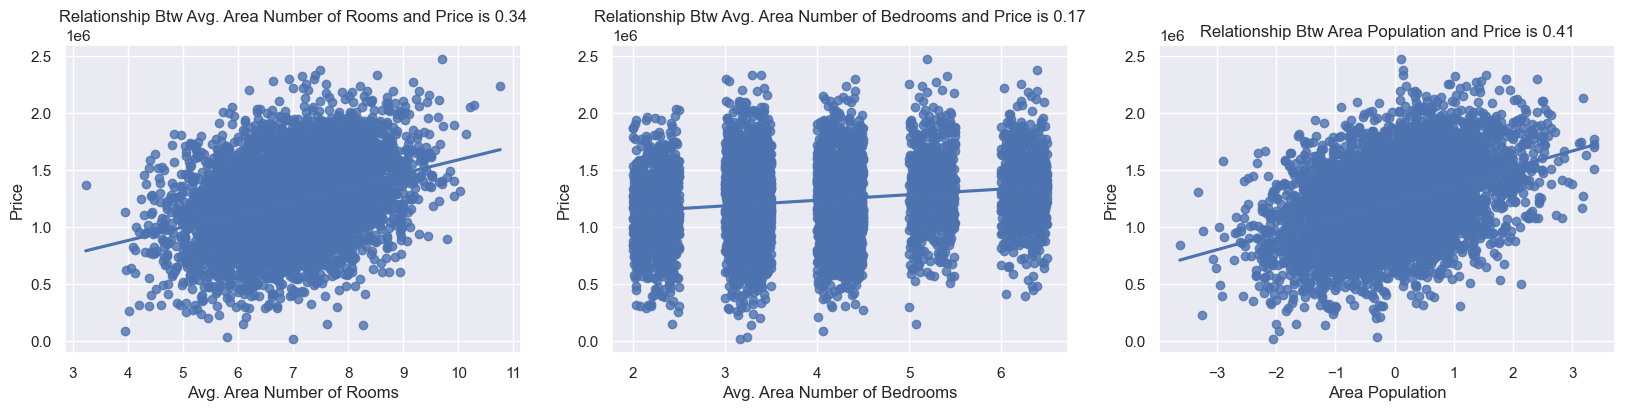

In [19]:
plotter(ds, 'Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms','Price')
plotter(ds,'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',	'Area Population',	'Price')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Splitting Into Train and Test
x = ds.drop('Price', axis = 1)
y = ds.Price

xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size = 0.15, random_state = 100)
# Initialize a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(xtrain, ytrain)

LinearRegression()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data (xtrain, ytrain)
lin_reg.fit(xtrain, ytrain)

# Cross-validation: predict the target variable for the training data
cross_validation = lin_reg.predict(xtrain)

# Calculate and print the R-squared score between the predicted values and the actual target values
print(r2_score(cross_validation, ytrain))

from sklearn.metrics import mean_squared_error

# Predict the target variable for the training data
y_pred = lin_reg.predict(xtrain)

# Calculate the mean squared error
mse = mean_squared_error(ytrain, y_pred)

print("Mean Squared Error (MSE):", mse)

0.9101712842229513
Mean Squared Error (MSE): 10273478036.12117


In [29]:
# Retrieving and Displaying Coefficients and Intercept of the Linear Regression Model

coeffs = lin_reg.coef_
intercept = lin_reg.intercept_

print(f'Model Coefficient: {coeffs}\n\nModel Intercepts: {intercept}')

Model Coefficient: [229234.58798396 165966.75401784 120612.26246897   1204.74710944
 151737.87395567]

Model Intercepts: -607081.2160065204


In [32]:
# Predict the target variable using the trained model
pred = lin_reg.predict(xtest)
score = r2_score(pred, ytest).round(2) # Check the accuracy of the model

print(f'The Model is {score * 100}% accurate')

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(ytest, pred)
print(f'Mean Squared Error: {mse}')

The Model is 91.0% accurate
Mean Squared Error: 9928490008.682331


<Axes: >

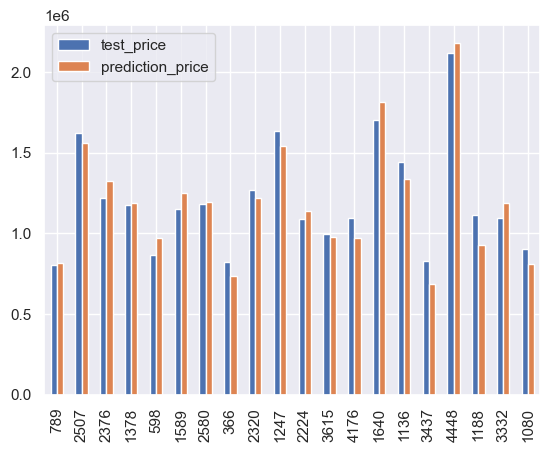

In [33]:
# Creating DataFrame to check predictions

check = pd.DataFrame()
check['Actual'] = ytest.reset_index(drop = True)
check['Predicted'] = pd.Series(pred)
check['Residuals'] = abs(check['Actual'] - check['Predicted'])

check

# Visualizing Predicted vs Actual House Prices

prediction_data = lin_reg.predict(xtest)
model_result = pd.DataFrame({'test_price': ytest, "prediction_price": prediction_data})
model_result.head(20).plot(kind="bar")

Text(0.5, 1.0, 'Homoscedasticity Of The Model')

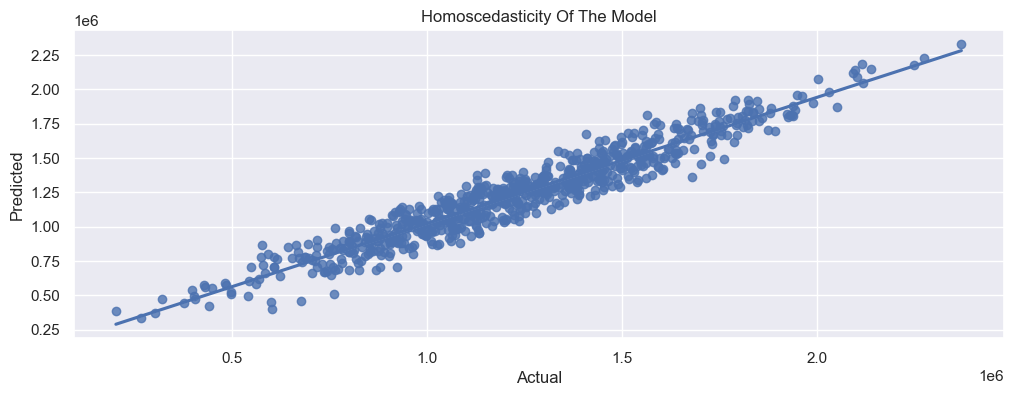

In [31]:
# Homoscedasticity
plt.figure(figsize = (12, 4))
sns.regplot(data = check, x = 'Actual', y = 'Predicted', ci = 0)
plt.title('Homoscedasticity Of The Model')

In [34]:
#Save your model
joblib.dump(lin_reg, open('HousepriceModel.pkl', 'wb'))

In [37]:
# import data and read to csv
data = pd.read_csv('housing.csv')
data.head()

# display columns
data.columns

# Select relevant columns for the analysis
sel_cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']
test = data[sel_cols]
test.head()

# display dataframe and drop address column
data.drop(columns=['Address'], inplace=True)
data.tail(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4990,52723.87656,5.452237,8.124571,6.39,14802.08844,4.795006e+05
4991,74102.19189,5.657841,7.683993,3.13,24041.27059,1.263721e+06
4992,87499.12574,6.403473,4.836091,4.02,40815.19968,1.568701e+06
4993,69639.14090,5.007510,7.778375,6.05,54056.12843,1.381831e+06
4994,73060.84623,5.293682,6.312253,4.16,22695.69548,9.053549e+05
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06
4999,65510.58180,5.992305,6.792336,4.07,46501.28380,1.298950e+06


In [39]:
# Extract the specific house data from the test set

house = test.iloc[4995, :]
house = pd.DataFrame(house).transpose()
house

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4995,60567.94414,7.830362,6.137356,3.46,22837.36103


In [40]:
# import transformers
import joblib
area_pop = joblib.load('Area Population_scaler.pkl')
area_inc = joblib.load('Avg. Area Income_scaler.pkl')
model = joblib.load('HousepriceModel.pkl')

# transforming house data
house['Area Population'] = area_pop.transform(house[['Area Population']])
house['Avg. Area Income'] = area_inc.transform(house[['Avg. Area Income']])

house

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4995,-0.752109,7.830362,6.137356,3.46,-1.342732


In [41]:
# predict house price

model.predict(house)

array([1060754.87391157])